<a href="https://colab.research.google.com/github/bchiramani/DataMining/blob/main/TP3datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP4 
Dans ce TP, on travaille avec la bibliotheque Scikit-Learn.

Scikit-Learn : est une bibliotheque de machine learning. elle est utilisée pour:
* la classification supervisée
* la regression
* la classification non supervisée
* la reduction de dimension(reduction du nombre de variable considéré)
* la selection de modele(comparaison,choix et validation des parametres et des modeles)
* le préprossessing 
...

Dans ce TP, on s'interesse de l'utilisation de Sikit-Learn pour la classification supervisée.




# Naive bayes

## Imports

In [ ]:
from sklearn import datasets
from collections import Counter

## Chargement de la Dataset
Iris est un ensemble (jeu) de données qui contient 150 exemples de critères observés sur des espèces différentes d'iris de Gaspésie (Setosa, Versicolor, Verginica). 
Chaque exemple est composé de quatre attributs: 
* longueur des sépales en cm
* largeur des sépales en cm
* longueur des pétales en cm
* largeur des pétales en cm

Iris est disponible dans scikit-learn dans le package datasets.Elle est constituée de deux dictionanaires : .data et .target

In [ ]:
irisData = datasets.load_iris()
print ("iri.data : " , irisData.data)
print ("iris.target : " , irisData.target)

iri.data :  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]


## Comprehension de la dataset
L'attribut feature_names retourne l'ensemble des noms des variables

In [ ]:
print("Feature names : " , irisData.feature_names)

Feature names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Distribution: est une methode qui calcul le nombre d'elements par classe

In [ ]:
def distribution(irisData):
  n0=0
  n1=0
  n2=0
  print(type(irisData.target))
  for i in irisData.target :
    if i==0:
      n0=n0+1
    if i==1:
      n1=n1+1
    if i==2:
      n2=n2+1
  print ("class0: ",n0)
  print ("class1: ",n1)
  print ("class2: ",n2)
  return 

In [ ]:
distribution(irisData)

<class 'numpy.ndarray'>
class0:  50
class1:  50
class2:  50


On peur de meme utiliser la sousclasse Counter pour calculer le nombre d'occurrence

In [ ]:
Counter(irisData.target)

Counter({0: 50, 1: 50, 2: 50})

Pour afficher les attributs du 32ème élément de l'échantillon 

In [ ]:
print("les attributs du 32 eme element sont : ", irisData.data[31])
print("la classe du 32 eme element est : ", irisData.target[31])

les attributs du 32 eme element sont :  [5.4 3.4 1.5 0.4]
la classe du 32 eme element est :  0


## Visualisation de la dataset

In [ ]:
import matplotlib
import pylab as pl
from itertools import cycle

plot_2D: est une fonction qui permet de visualiser les observations en fonction de deux variables att1 et att2.

In [ ]:
def plot_2D(data, target, target_names,att1,att2,x1=0,x2=0):
  colors = cycle('rgbcmykw') # cycle de couleurs
  target_ids = range(len(target_names))
  pl.figure()
  for i, c, label in zip(target_ids, colors, target_names):
    pl.scatter(data[target == i, att1], data[target == i, att2], c=c, label=label)
  pl.legend()
  pl.plot(x1,x2)
  pl.show()

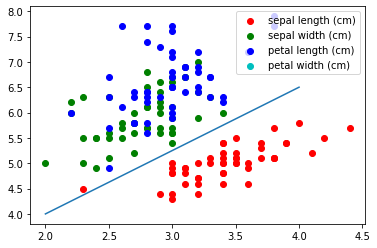

In [ ]:
plot_2D(irisData.data,irisData.target,irisData.feature_names,1,0,[2,4],[4,6.5])

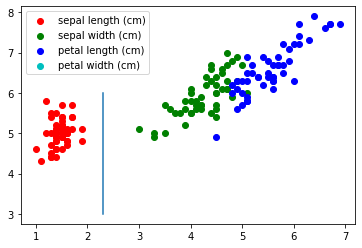

In [ ]:
plot_2D(irisData.data,irisData.target,irisData.feature_names,2,0,[2.3,2.3],[3,6])

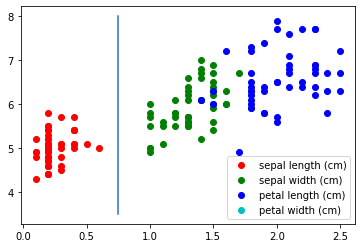

In [ ]:
plot_2D(irisData.data,irisData.target,irisData.feature_names,3,0,[0.75,0.75],[3.5,8])

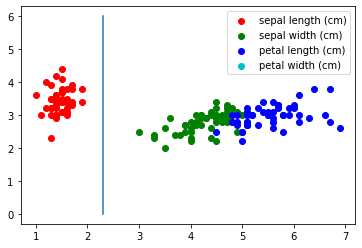

In [ ]:
plot_2D(irisData.data,irisData.target,irisData.feature_names,2,1,[2.3,2.3],[0,6])

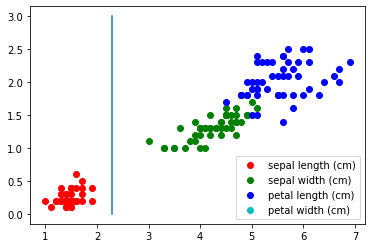

In [ ]:
plot_2D(irisData.data,irisData.target,irisData.feature_names,2,3,[2.3,2.3],[0,3])

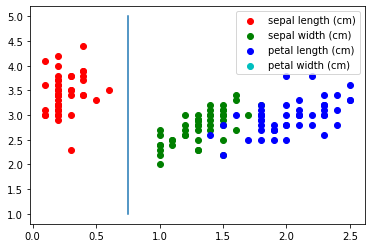

In [ ]:
plot_2D(irisData.data,irisData.target,irisData.feature_names,3,1,[0.75,0.75],[1,5])

## Classifieur Naive Bayes


### Simple Split

In [ ]:
from sklearn import naive_bayes

Sous scikit-learn, dans toute méthode de classification est représentée par la variable clf qui possede deux fonctions essentielles :
* La fonction clf.fit(tab_data, tab_target) qui apprend un modèle à partir
des données.,
* La fonction clf.predict(tab_data) qui renvoie un tableau qui stocke, pour
chaque nouvelle donnée en entrée, la classe prédite par le modèle précédemment appris via l'estimateur 

Le modele s'entraine sur la totalité de la dataset , puis il test sur la meme dataset . Il predit les classes correctement. Cependant ce n'est pas une vraie evaluation parceque le modele est deja entrainé sur la meme dataset 

In [ ]:
clf = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage
irisData = datasets.load_iris()
clf.fit(irisData.data[:], irisData.target[:])
p31 = clf.predict([irisData.data[31]])
print("la valeur predite de la 32eme observation par ce classifieur est : ",p31)
plast = clf.predict([irisData.data[-1]])
print("la valeur predite de la derniere observation par ce classifieur est : ",plast)
p = clf.predict(irisData.data[:])
print("les valeurs predites de l'ensemble de données iris par ce classifieur est : ")
print(p)
print("les vraies valeurs des classes de l'ensemble des attributs est : ")
print(irisData.target)

la valeur predite de la 32eme observation par ce classifieur est :  [0]
la valeur predite de la derniere observation par ce classifieur est :  [2]
les valeurs predites de l'ensemble de données iris par ce classifieur est : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
les vraies valeurs des classes de l'ensemble des attributs est : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Pour bien analyser la validité du modele, il s'entraine sur 2/3 de la dataset , puis il predit les 1/3 restants . Ceci permet de le tester.
Dans ce cas la datqet est ordonnée: une sequence de 0 suivit d'une sequence de 1 puis une sequence de 2.
Le modele, lors de son entrainement n'a jamais vu une observation dont la classe est 2. 


In [ ]:
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB(fit_prior=True)
clf.fit(irisData.data[:99], irisData.target[:99])
p=clf.predict(irisData.data[100:])
print("les valeurs predites sont : " )
print(p)
print("les vraies valeurs sont : ")
print(irisData.target[100:])

les valeurs predites sont : 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
les vraies valeurs sont : 
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


Pour corriger l'erreur , il faut melanger(shuffle) la dataset avant de la divisée en train et test

In [ ]:
def incorrect_classification(y,p):
  ea = 0
  for i in range(len(y)):
    if (p[i] != y[i]):
      ea = ea+1
  ea=ea/len(irisData.data[100:])
  return ea

In [ ]:
import numpy as np
incorrect_classification(irisData.target[100:],p)
diff=p-y
print("pourcentage des elements incorrectement classifier est : ",np.count_nonzero(diff)/diff.shape[0])


pourcentage des elements incorrectement classifier est :  1.0


In [ ]:
print("l'accuracy est : ",nb.score(irisData.data,irisData.target))

l'accuracy est :  0.9666666666666667


In [ ]:
irisData.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
print(set(irisData.target))
np.where(irisData.target == 1)

{0, 1, 2}


(array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
        84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

### Split respectant la distribution de la dataset

In [ ]:
import random

def split(s):
  train_data = []
  test_data = []
  train_target = []
  test_target = []

  for target in set(s.target):
    targets = np.where(s.target == target)[0].tolist()
    lengths = len(targets)
    # size 2/3
    take_target = random.sample(targets, lengths*2//3)
    give_target = [target for target in targets if target not in take_target]
    train_data.extend(s.data[take_target])
    train_target.extend(s.target[take_target])
    # size 1/3
    test_data.extend(s.data[give_target])
    test_target.extend(s.target[give_target])
  train = list(zip(train_data, train_target))
  random.shuffle(train)
  train_data, train_target = zip(*train)

  test = list(zip(test_data, test_target))
  random.shuffle(test)
  test_data, test_target = zip(*test)

  return np.array(train_data), np.array(train_target), np.array(test_data), np.array(test_target)

## Estimation de l'erreur

### Test manuel

In [ ]:
def test(s,clf):
  train_X, train_y , test_X, test_y = split(irisData)
  clf.fit(train_X, train_y)
  predict_y=clf.predict(test_X)
  # print("les valeurs predites sont : " )
  # print(predict_y)
  # print("les vraies valeurs sont : ")
  # print(test_y)
  ea=incorrect_classification(test_y,predict_y)
  # print("pourcentage des elements incorrectement classifier est : ",incorrect_classification(test_y,predict_y))
  # diff=predict_y-test_y
  # print("pourcentage des elements incorrectement classifier est : ",np.count_nonzero(diff)/diff.shape[0])
  return  ea


In [ ]:
def multiple_test(s,clf,n):
  ea=0
  for i in range(0,n):
    ea+=test(s,clf)
  print(ea/n)
    

In [ ]:
clf = naive_bayes.MultinomialNB(fit_prior=True)
for i in range(0,20):
  multiple_test(irisData,clf,200)

0.045199999999999886
0.04509999999999991
0.04709999999999992
0.046299999999999945
0.048299999999999885
0.048399999999999894
0.044599999999999904
0.044899999999999905
0.0471999999999999
0.04439999999999986
0.04889999999999992
0.04479999999999988
0.045599999999999884
0.0470999999999999
0.046399999999999914
0.0434999999999999
0.04439999999999989
0.04449999999999992
0.0455999999999999
0.046499999999999916


In [ ]:
from sklearn.model_selection import train_test_split
n=200
for i in range(0,20):
  ea=0
  for j in range(0,n):
    x_train,x_test,y_train,y_test=train_test_split(irisData.data,irisData.target,test_size=0.33)
    y_train
    clf.fit(x_train, y_train)
    predict_y=clf.predict(x_test)
    ea=incorrect_classification(y_test,predict_y)
  ea=ea/n
  print(ea)


0.0004
0.002
0.0002
0.0009
0.0018
0.0017000000000000001
0.0006
0.001
0.0002
0.0021
0.0006
0.0017000000000000001
0.0002
0.002
0.0016
0.0021
0.0003
0.0002
0.0019
0.0012


### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, irisData.data, irisData.target, cv=10)
scores

array([1.        , 1.        , 1.        , 0.93333333, 0.86666667,
       0.93333333, 0.8       , 1.        , 1.        , 1.        ])

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_decision_tree = DecisionTreeClassifier()

## Test manuel 

In [ ]:
for i in range(0,20):
  multiple_test(irisData,clf_decision_tree,200)

0.054099999999999884
0.05759999999999991
0.0560999999999999
0.05809999999999991
0.054999999999999896
0.05459999999999995
0.057699999999999904
0.05259999999999988
0.05649999999999991
0.05539999999999986
0.059199999999999926
0.05779999999999986
0.05649999999999988
0.05429999999999992
0.054199999999999846
0.055999999999999925
0.0546999999999999
0.05719999999999991
0.05439999999999987
0.056099999999999886


## Cros-validation

In [ ]:
scores = cross_val_score(clf_decision_tree, irisData.data, irisData.target, cv=10)
scores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])